In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import pandas as pd
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d as interp
from scipy.integrate import quad
hirai = np.load('hirai_approx.npz')
vogelsang = np.load('vogelsang_approx.npz')
hirainum = np.load('hirai-exact_alpha.npz')
vogelsangnum = np.load('vogelsang-exact_alpha.npz')
plt.rcParams['text.usetex'] = True
plt.rc('axes', labelsize=22)

# Figure 1, evolution of the GS-A distribution

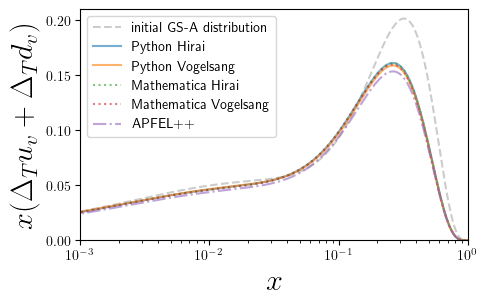

In [2]:
plt.figure(figsize=(5, 3))
plt.plot(hirai['x'], hirai['upd'], '--', c='k', alpha=0.2, label=r'initial GS-A distribution')
plt.plot(hirai['x'], hirai['u_evolved'] + hirai['d_evolved'], alpha=0.6, label=r'Python Hirai')
plt.plot(vogelsang['evolved_x'], vogelsang['u_evolved'] + vogelsang['d_evolved'], alpha=0.6, label=r'Python Vogelsang')
plt.plot(*np.genfromtxt('mathematica_hirai_ana.dat').T,':',alpha=0.6,label=r'Mathematica Hirai')
plt.plot(*np.genfromtxt('mathematica_vogelsang_ana.dat').T,':',alpha=0.6,label=r'Mathematica Vogelsang')
plt.plot(*np.genfromtxt('apfel_out.txt').T,'-.', alpha=0.6, label=r'APFEL++')
plt.xlabel('$x$')
plt.ylabel(r'$x(\Delta_T u_v+\Delta_T d_v)$')
plt.xlim([1e-3,1])
plt.ylim([0, 0.21])
plt.xscale('log')
plt.legend()
plt.savefig('fig1.svg')

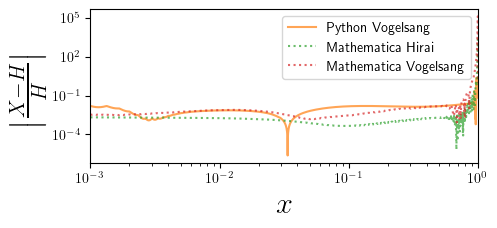

In [3]:
from scipy.interpolate import interp1d as interp
plt.figure(figsize=(5, 2))
xs = hirai['x']
toPlot1 = interp(vogelsang['evolved_x'], vogelsang['u_evolved'] + vogelsang['d_evolved'], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot1(x) for x in xs]) / (hirai['u_evolved'] + hirai['d_evolved']+1e-16) - 1), color='tab:orange', label=r'Python Vogelsang', alpha=0.7)
toPlot2 = interp(np.genfromtxt('mathematica_hirai_ana.dat')[:,0], np.genfromtxt('mathematica_hirai_ana.dat')[:,1], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot2(x) for x in xs]) / (hirai['u_evolved'] + hirai['d_evolved']+1e-16) - 1), ':', color='tab:green', label=r'Mathematica Hirai', alpha=0.7)
toPlot3 = interp(np.genfromtxt('mathematica_vogelsang_ana.dat')[:,0], np.genfromtxt('mathematica_vogelsang_ana.dat')[:,1], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot3(x) for x in xs]) / (hirai['u_evolved'] + hirai['d_evolved']+1e-16) - 1), ':', color='tab:red', label=r'Mathematica Vogelsang', alpha=0.7)
#toPlot4 = interp(np.genfromtxt('apfel_out.txt')[:,0], np.genfromtxt('apfel_out.txt')[:,1], fill_value=0, assume_sorted=True)
#plt.plot(xs, np.abs(np.array([toPlot4(x) for x in xs]) / (hirai['u_evolved'] + hirai['d_evolved']+1e-16) - 1), '-.', color='tab:purple', label=r'APFEL++', alpha=0.7)
plt.xlabel('$x$')
plt.ylabel(r'$\left|\frac {X-H}H\right|$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1])
plt.legend()
plt.savefig('fig1_relative_diff.svg')

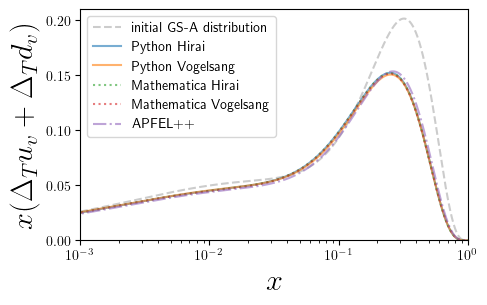

In [4]:
plt.figure(figsize=(5, 3))
plt.plot(hirainum['x'], hirainum['upd'], '--', c='k', alpha=0.2, label=r'initial GS-A distribution')
plt.plot(hirainum['x'], hirainum['u_evolved'] + hirainum['d_evolved'], alpha=0.6, label=r'Python Hirai')
plt.plot(vogelsangnum['evolved_x'], vogelsangnum['u_evolved'] + vogelsangnum['d_evolved'], alpha=0.6, label=r'Python Vogelsang')
plt.plot(*np.genfromtxt('mathematica_hirai_num.dat').T,':',alpha=0.6,label=r'Mathematica Hirai')
plt.plot(*np.genfromtxt('mathematica_vogelsang_num.dat').T,':',alpha=0.6,label=r'Mathematica Vogelsang')
plt.plot(*np.genfromtxt('apfel_out.txt').T,'-.', alpha=0.6, label=r'APFEL++')
plt.xlabel('$x$')
plt.ylabel(r'$x(\Delta_T u_v+\Delta_T d_v)$')
plt.xlim([1e-3,1])
plt.ylim([0, 0.21])
plt.xscale('log')
plt.legend()
plt.savefig('fig1_exact_alpha.svg')

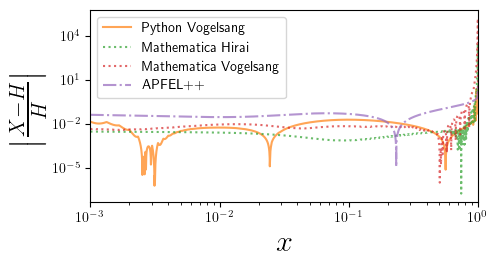

In [5]:
from scipy.interpolate import interp1d as interp
plt.figure(figsize=(5, 2.5))
xs = hirainum['x']
toPlot4 = interp(vogelsangnum['evolved_x'], vogelsangnum['u_evolved'] + vogelsangnum['d_evolved'], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot4(x) for x in xs]) / (hirainum['u_evolved'] + hirainum['d_evolved']+1e-16) - 1), color='tab:orange', label=r'Python Vogelsang', alpha=0.7)
toPlot5 = interp(np.genfromtxt('mathematica_hirai_num.dat')[:,0], np.genfromtxt('mathematica_hirai_num.dat')[:,1], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot5(x) for x in xs]) / (hirainum['u_evolved'] + hirainum['d_evolved']+1e-16) - 1), ':', color='tab:green', label=r'Mathematica Hirai', alpha=0.7)
toPlot6 = interp(np.genfromtxt('mathematica_vogelsang_num.dat')[:,0], np.genfromtxt('mathematica_vogelsang_num.dat')[:,1], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot6(x) for x in xs]) / (hirainum['u_evolved'] + hirainum['d_evolved']+1e-16) - 1), ':', color='tab:red', label=r'Mathematica Vogelsang', alpha=0.7)
toPlot7 = interp(np.genfromtxt('apfel_out.txt')[:,0], np.genfromtxt('apfel_out.txt')[:,1], fill_value=0, assume_sorted=True)
plt.plot(xs, np.abs(np.array([toPlot7(x) for x in xs]) / (hirainum['u_evolved'] + hirainum['d_evolved']+1e-16) - 1), '-.', color='tab:purple', label=r'APFEL++', alpha=0.7)
plt.xlabel('$x$')
plt.ylabel(r'$\left|\frac {X-H}H\right|$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1])
plt.legend()
plt.savefig('fig1_exact_alpha_relative_diff.svg')

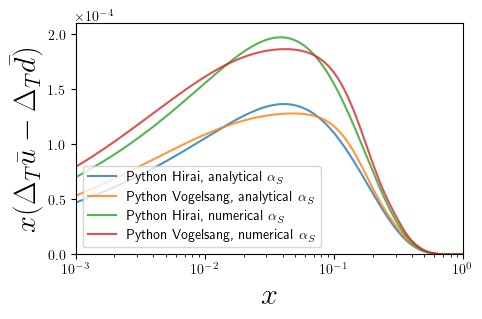

In [6]:
plt.figure(figsize=(5, 3))
plt.plot(hirai['x'], hirai['output'], alpha=0.8, label=r'Python Hirai, analytical $\alpha_S$')
plt.plot(vogelsang['evolved_x'], vogelsang['output'], alpha=0.8, label=r'Python Vogelsang, analytical $\alpha_S$')
plt.plot(hirainum['x'], hirainum['output'], alpha=0.8, label=r'Python Hirai, numerical $\alpha_S$')
plt.plot(vogelsangnum['evolved_x'], vogelsangnum['output'], alpha=0.8, label=r'Python Vogelsang, numerical $\alpha_S$')
plt.xlabel('$x$')
plt.ylabel(r'$x(\Delta_T \bar u-\Delta_T \bar d)$')
plt.xlim([1e-3,1])
plt.ylim([0, 2.1e-4])
plt.xscale('log')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.savefig('fig2.svg')

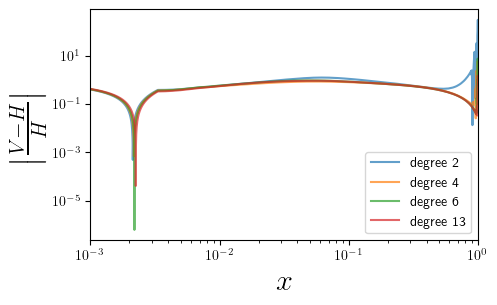

In [7]:
from scipy.interpolate import interp1d as interp
plt.figure(figsize=(5, 3))
xs = hirainum['x']
for deg in [2, 4, 6, 13]:
    fn = f'vogelsang_exact_alpha_variable_degree/vogelsang-exact_alpha_deg_{deg}_N_3000.npz'
    vogelsang = np.load(fn)
    toPlot = interp(*vogelsang['u_evolved'], fill_value=0, assume_sorted=True)
    plt.plot(xs, np.abs(np.array([toPlot(x) for x in xs]) / (hirainum['u_evolved'] + hirainum['d_evolved']+1e-16) - 1), label=f'degree {deg}', alpha=0.7)

plt.xlabel('$x$')
plt.ylabel(r'$\left|\frac {V-H}H\right|$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1])
plt.legend()
plt.savefig('fig1_relative_diff_degree.svg')

In [8]:
'''plt.figure(figsize=(5, 3))
plt.plot(hirainum['x'], hirainum['output'], alpha=0.8, label=r'Python Hirai (200 GeV$^2$)')
plt.plot(*np.genfromtxt('mathematica_diff.dat').T,alpha=0.6,label=r'Mathematica Hirai (200 GeV$^2$)')

from scipy.interpolate import interp1d as interp
xs = hirainum['x']
for opt in ['','_deg7','_deg9','_deg11']:
    fn = f'vogelsang-exact_alpha{opt}.npz'
    vogelsang = np.load(fn)
    toPlot = interp(vogelsang['x'], vogelsang['output'], fill_value=0, assume_sorted=True)
    plt.plot(xs, [toPlot(x) for x in  xs], label=f'degree {5 if len(opt) == 0 else opt.split('deg')[-1]}', alpha=0.6)

plt.xlabel('$x$')
plt.ylabel(r'$x(\Delta_T \bar u-\Delta_T \bar d)$')
plt.xlim([1e-3,1])
#plt.ylim([0, 2e-4])
plt.xscale('log')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.savefig('fig2_exact_alpha-relative.svg')'''

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/wc/4fc3pqsx0hg27t7q7_sspdqm0000gn/T/ipykernel_37160/2334933336.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel(r'$x(\Delta_T \bar u-\Delta_T \bar d)$')


"plt.figure(figsize=(5, 3))\nplt.plot(hirainum['x'], hirainum['output'], alpha=0.8, label=r'Python Hirai (200 GeV$^2$)')\nplt.plot(*np.genfromtxt('mathematica_diff.dat').T,alpha=0.6,label=r'Mathematica Hirai (200 GeV$^2$)')\n\nfrom scipy.interpolate import interp1d as interp\nxs = hirainum['x']\nfor opt in ['','_deg7','_deg9','_deg11']:\n    fn = f'vogelsang-exact_alpha{opt}.npz'\n    vogelsang = np.load(fn)\n    toPlot = interp(vogelsang['x'], vogelsang['output'], fill_value=0, assume_sorted=True)\n    plt.plot(xs, [toPlot(x) for x in  xs], label=f'degree {5 if len(opt) == 0 else opt.split('deg')[-1]}', alpha=0.6)\n\nplt.xlabel('$x$')\nplt.ylabel(r'$x(\\Delta_T \x08ar u-\\Delta_T \x08ar d)$')\nplt.xlim([1e-3,1])\n#plt.ylim([0, 2e-4])\nplt.xscale('log')\nplt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))\nplt.legend()\nplt.savefig('fig2_exact_alpha-relative.svg')"

# Figure 3: Optimal degree of approximation for the moment method

In [9]:
folder = 'vogelsang_exact_alpha_variable_degree'
nx = 3000
nt = 500
ref = np.load(f'hirai_exact_alpha_nx_nt/hirai-exact_alpha_nx_{nx}_nt_{nt}.npz')
ref = interp(ref['u_evolved'][0], ref['u_evolved'][1] + ref['d_evolved'][1], fill_value=0, assume_sorted=True)
total_area = quad(ref, 0, 1)[0]
data = []
nxs = [100, 200, 300, 500, 1000, 2000, 3000]
degs = range(2, 11)
for nx in nxs:
    row = []
    for deg in degs:
        file = np.load(f'{folder}/vogelsang-exact_alpha_deg_{deg}_N_{nx}.npz')
        x = file['u_evolved'][0]
        y = file['u_evolved'][1] + file['d_evolved'][1]
        test = interp(x, y, fill_value=0, assume_sorted=True)
        err = quad(lambda x: np.abs(ref(x) - test(x)), 0, 1)[0] / total_area
        row.append(err)
    data.append(row)

/var/folders/wc/4fc3pqsx0hg27t7q7_sspdqm0000gn/T/ipykernel_37160/4211724316.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  total_area = quad(ref, 0, 1)[0]
/var/folders/wc/4fc3pqsx0hg27t7q7_sspdqm0000gn/T/ipykernel_37160/4211724316.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  err = quad(lambda x: np.abs(ref(x) - test(x)), 0, 1)[0] / total_area


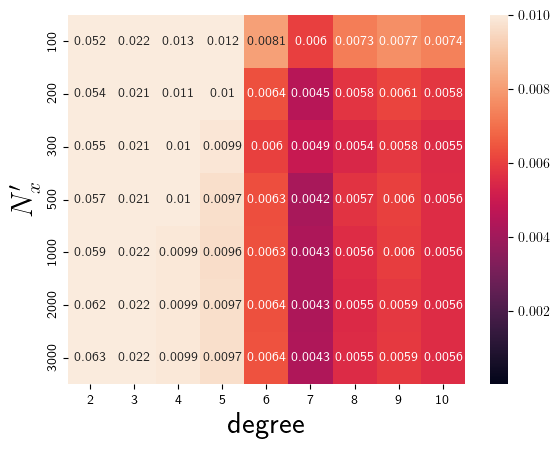

In [10]:
heatmap(data, vmin=1e-5, vmax=0.01, xticklabels=degs, yticklabels=nxs, annot=True)
plt.xlabel('degree')
plt.ylabel('$N_x\'$')
plt.savefig('fig3_optimal_degree_heatmap.svg')

# Figure 4: Optimal $N_x$ and $N_t$ for the x-space method

In [11]:
folder = 'hirai_exact_alpha_nx_nt'
nx = 3000
nt = 500
ref = np.load(f'{folder}/hirai-exact_alpha_nx_{nx}_nt_{nt}.npz')
ref = interp(ref['u_evolved'][0], ref['u_evolved'][1] + ref['d_evolved'][1], fill_value=0, assume_sorted=True)
total_area = quad(ref, 0, 1)[0]
data = []
nxs = [100, 200, 500, 1000, 2000, 3000]
nts = [25, 50, 100, 200, 500]
for nx in nxs:
    row = []
    for nt in nts:
        file = np.load(f'{folder}/hirai-exact_alpha_nx_{nx}_nt_{nt}.npz')
        x = file['u_evolved'][0]
        y = file['u_evolved'][1] + file['d_evolved'][1]
        test = interp(x, y, fill_value=0, assume_sorted=True)
        err = quad(lambda x: np.abs(ref(x) - test(x)), 0, 1)[0] / total_area
        row.append(err)
    data.append(row)

/var/folders/wc/4fc3pqsx0hg27t7q7_sspdqm0000gn/T/ipykernel_37160/3853086737.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  total_area = quad(ref, 0, 1)[0]
/var/folders/wc/4fc3pqsx0hg27t7q7_sspdqm0000gn/T/ipykernel_37160/3853086737.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  err = quad(lambda x: np.abs(ref(x) - test(x)), 0, 1)[0] / total_area


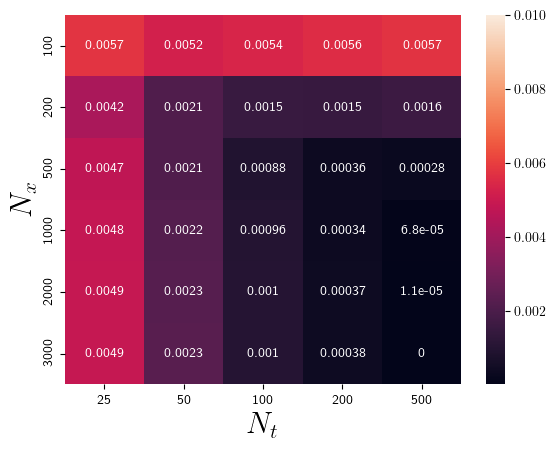

In [12]:
heatmap(data, vmin=1e-5, vmax=0.01, xticklabels=nts, yticklabels=nxs, annot=True)
plt.xlabel('$N_t$')
plt.ylabel('$N_x$')
plt.savefig('fig4_heatmap.svg')